In [1]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

cancer_data = load_breast_cancer()
df = pd.DataFrame(cancer_data['data'], columns=cancer_data['feature_names'])
df['target'] = cancer_data['target']

X = df[cancer_data.feature_names].values
y = df['target'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=101)

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

first_row = X_test[0]
print("prediction:", rf.predict([first_row]))
print("true value:", y_test[0])

prediction: [1]
true value: 1


In [2]:
print("random forest accuracy:", rf.score(X_test, y_test))


random forest accuracy: 0.972027972027972


In [3]:
#now compare the random forest with the decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

cancer_data = load_breast_cancer()
df = pd.DataFrame(cancer_data['data'], columns=cancer_data['feature_names'])
df['target'] = cancer_data['target']

X = df[cancer_data.feature_names].values
y = df['target'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=101)

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
print("decision tree accuracy:", dt.score(X_test, y_test))

decision tree accuracy: 0.9230769230769231


In [5]:
#now tune the random forest model
from sklearn.model_selection import GridSearchCV

cancer_data = load_breast_cancer()
df = pd.DataFrame(cancer_data['data'], columns=cancer_data['feature_names'])
df['target'] = cancer_data['target']

X = df[cancer_data.feature_names].values
y = df['target'].values

param_grid = {
    'n_estimators': [10, 25, 50, 75, 100],
}

rf = RandomForestClassifier(random_state=123)
gs = GridSearchCV(rf, param_grid, scoring='f1', cv=5)
gs.fit(X, y)
print("best params:", gs.best_params_)

best params: {'n_estimators': 25}


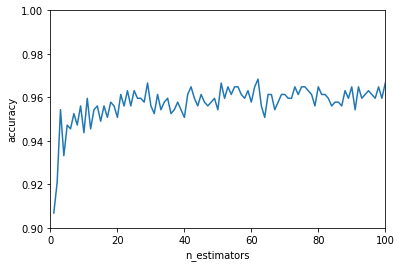

In [6]:
#Elbow Graph is a model that optimizes performance without adding unnecessary complexity. 
n_estimators = list(range(1, 101))
param_grid = {
    'n_estimators': n_estimators,
}
rf = RandomForestClassifier()
gs = GridSearchCV(rf, param_grid, cv=5)
gs.fit(X, y)
import matplotlib.pyplot as plt

scores = gs.cv_results_['mean_test_score']
plt.plot(n_estimators, scores)
plt.xlabel("n_estimators")
plt.ylabel("accuracy")
plt.xlim(0, 100)
plt.ylim(0.9, 1)
plt.show()

In [7]:
rf = RandomForestClassifier(n_estimators=10)
rf.fit(X, y) 

RandomForestClassifier(n_estimators=10)

In [8]:
rf = RandomForestClassifier(n_estimators=10, random_state=111)
rf.fit(X_train, y_train)
print(rf.score(X_test, y_test))


0.965034965034965


In [11]:
worst_cols = [col for col in df.columns if 'worst' in col]
print(worst_cols)
X_worst = df[worst_cols]
X_train, X_test, y_train, y_test = train_test_split(X_worst, y, random_state=101)
rf.fit(X_train, y_train)
print(rf.score(X_test, y_test))
#Here we are able to improve the accuracy using a subset of features, a third of the total features to be exact. 

['worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension']
0.972027972027972


In [12]:
from sklearn.datasets import make_circles
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import numpy as np

X, y = make_circles(noise=0.2, factor=0.5, random_state=1)

kf = KFold(n_splits=5, shuffle=True, random_state=1)
lr_scores = []
rf_scores = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    lr = LogisticRegression(solver='lbfgs')
    lr.fit(X_train, y_train)
    lr_scores.append(lr.score(X_test, y_test))
    rf = RandomForestClassifier(n_estimators=100)
    rf.fit(X_train, y_train)
    rf_scores.append(rf.score(X_test, y_test))
print("LR accuracy:", np.mean(lr_scores))
print("RF accuracy:", np.mean(rf_scores))
"""When looking to get a benchmark for a new classification problem, it is common practice to start by building a Logistic Regression model and a Random Forest model as these two models both have potential to perform well without any tuning. """

LR accuracy: 0.36
RF accuracy: 0.8099999999999999
